In [1]:
# Read data from file dna_rna_combined.csv.
#Drop null valueas and create dataframes for DNA and RNA data. 
#Binding affinity for the ligands 
#Visualizations for Ligand , Value and moleculer weight for RNA and DNA.
#Linear regression between Molecular weight and Binding affinity

In [2]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pprint import pprint
from scipy.stats import linregress

In [3]:
# Read in the csv file
proj_dna_rna = pd.read_csv("Resources/CSV files for DNA and RNA/dna_rna_combined.csv")
proj_dna_rna.head()

,Entry ID,Experimental Method,Release Date,Ligand,Value,Symbol,Type,Unit,PDB ID,Molecular Weight per Deposited Model,Number of Distinct DNA Entities,Number of Distinct Protein Entities,Resolution (Å),Stucture Keywords
0,100D,X-RAY DIFFRACTION,1995-03-31,NaN,NaN,NaN,NaN,NaN,100D,6.36,NaN,NaN,1.9,DNA-RNA HYBRID
1,101D,X-RAY DIFFRACTION,1995-02-27,NaN,NaN,NaN,NaN,NaN,101D,7.94,1.0,NaN,2.25,DNA
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,102D,X-RAY DIFFRACTION,1995-02-07,NaN,NaN,NaN,NaN,NaN,102D,7.64,1.0,NaN,2.2,DNA
4,103D,SOLUTION NMR,1995-03-31,NaN,NaN,NaN,NaN,NaN,103D,7.50,1.0,NaN,NaN,DNA


In [4]:
#Drop data/rows with missing values 

proj_dna_filter=proj_dna_rna.dropna(how='all')

In [5]:
proj_dna_filter

,Entry ID,Experimental Method,Release Date,Ligand,Value,Symbol,Type,Unit,PDB ID,Molecular Weight per Deposited Model,Number of Distinct DNA Entities,Number of Distinct Protein Entities,Resolution (Å),Stucture Keywords
0,100D,X-RAY DIFFRACTION,1995-03-31,NaN,NaN,NaN,NaN,NaN,100D,6.36,NaN,NaN,1.9,DNA-RNA HYBRID
1,101D,X-RAY DIFFRACTION,1995-02-27,NaN,NaN,NaN,NaN,NaN,101D,7.94,1.0,NaN,2.25,DNA
3,102D,X-RAY DIFFRACTION,1995-02-07,NaN,NaN,NaN,NaN,NaN,102D,7.64,1.0,NaN,2.2,DNA
4,103D,SOLUTION NMR,1995-03-31,NaN,NaN,NaN,NaN,NaN,103D,7.50,1.0,NaN,NaN,DNA
5,104D,SOLUTION NMR,1995-03-31,NaN,NaN,NaN,NaN,NaN,104D,7.45,NaN,NaN,NaN,DNA-RNA HYBRID
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5949,8SY1,X-RAY DIFFRACTION,2023-05-31,NaN,NaN,NaN,NaN,NaN,8SY1,21.09,NaN,NaN,1.76,RNA
5950,8THV,SOLUTION NMR,2023-08-02,NaN,NaN,NaN,NaN,NaN,8THV,9.31,NaN,NaN,NaN,RNA
5951,8U3M,SOLUTION NMR,2023-10-04,NaN,NaN,NaN,NaN,NaN,8U3M,9.92,NaN,NaN,NaN,RNA
5952,9BNA,X-RAY DIFFRACTION,1991-04-15,NaN,NaN,NaN,NaN,NaN,9BNA,7.33,1.0,NaN,1.9,DNA


In [6]:
#Drop rows where Ligand is Null

proj_dna_filter1=proj_dna_filter.dropna(subset=["Ligand"])

In [7]:
proj_dna_filter1['Stucture Keywords'].value_counts()

Stucture Keywords
RNA                  49
DNA                  15
HIV-1                 2
RNA/antibiotic        2
TRANSCRIPTION         2
RNA/INHIBITOR         1
DNA/DNA INHIBITOR     1
RNA/ANTIBIOTIC        1
TRANSLATION           1
Name: count, dtype: int64

In [8]:
#Set Index

proj_dna_filter1=proj_dna_filter1.set_index('Entry ID')

In [9]:
proj_dna_filter1

,Experimental Method,Release Date,Ligand,Value,Symbol,Type,Unit,PDB ID,Molecular Weight per Deposited Model,Number of Distinct DNA Entities,Number of Distinct Protein Entities,Resolution (Å),Stucture Keywords
Entry ID,,,,,,,,,,,,,
1ARJ,SOLUTION NMR,1996-11-08,ARG,1000000.0,NaN,Kd,nM,1ARJ,9.48,NaN,NaN,NaN,RNA
1BYJ,SOLUTION NMR,1999-10-29,GE1,2000.0,NaN,Kd,nM,1BYJ,9.11,NaN,NaN,NaN,RNA
1CVX,X-RAY DIFFRACTION,2000-01-15,HP2,11000.0,NaN,Kd,nM,1CVX,7.42,1.0,NaN,2.27,DNA
1CVY,X-RAY DIFFRACTION,2000-01-15,IPY,380.0,NaN,Kd,nM,1CVY,7.39,1.0,NaN,2.15,DNA
1DB6,SOLUTION NMR,2000-02-03,AAR,100000.0,NaN,Kd,nM,1DB6,6.90,1.0,NaN,NaN,DNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4ERJ,X-RAY DIFFRACTION,2012-07-18,ACA,3100000.0,NaN,Kd,nM,4ERJ,52.60,NaN,NaN,3,TRANSCRIPTION
4ERL,X-RAY DIFFRACTION,2012-07-18,LYS,570000.0,NaN,Kd,nM,4ERL,52.69,NaN,NaN,3,TRANSCRIPTION
4FE5,X-RAY DIFFRACTION,2012-06-27,HPA,732.0,NaN,Kd,nM,4FE5,22.73,NaN,NaN,1.32,RNA


In [10]:
#Filter data based on Stucture Keywords 'DNA' and Type as Kd

proj_dna_filter1_DNA=proj_dna_filter1.loc[(proj_dna_filter1['Stucture Keywords']=='DNA') & (proj_dna_filter1['Type']=='Kd')]

In [11]:
proj_dna_filter1_DNA

,Experimental Method,Release Date,Ligand,Value,Symbol,Type,Unit,PDB ID,Molecular Weight per Deposited Model,Number of Distinct DNA Entities,Number of Distinct Protein Entities,Resolution (Å),Stucture Keywords
Entry ID,,,,,,,,,,,,,
1CVX,X-RAY DIFFRACTION,2000-01-15,HP2,11000.0,NaN,Kd,nM,1CVX,7.42,1.0,NaN,2.27,DNA
1CVY,X-RAY DIFFRACTION,2000-01-15,IPY,380.0,NaN,Kd,nM,1CVY,7.39,1.0,NaN,2.15,DNA
1DB6,SOLUTION NMR,2000-02-03,AAR,100000.0,NaN,Kd,nM,1DB6,6.90,1.0,NaN,NaN,DNA
1P96,SOLUTION NMR,2003-08-26,DDI,2540.0,NaN,Kd,nM,1P96,8.49,2.0,NaN,NaN,DNA
1Q2T,SOLUTION NMR,2003-09-23,DNA,500000.0,NaN,Kd,nM,1Q2T,7.77,1.0,NaN,NaN,DNA
1QMS,SOLUTION NMR,1999-10-12,CCI,1.0,NaN,Kd,nM,1QMS,9.34,2.0,NaN,NaN,DNA
1QV4,X-RAY DIFFRACTION,2004-09-07,MBB,124.0,NaN,Kd,nM,1QV4,7.79,1.0,NaN,2.5,DNA
1QV8,X-RAY DIFFRACTION,2004-09-07,BBZ,114.0,NaN,Kd,nM,1QV8,7.78,1.0,NaN,2.5,DNA
1R4E,SOLUTION NMR,2004-04-27,DDI,5330.0,NaN,Kd,nM,1R4E,8.49,2.0,NaN,NaN,DNA


In [12]:
#Find the min value for DNA and also print the corresponding Ligand 

test_DNA=proj_dna_filter1_DNA['Value'].min()

In [13]:
# For DNA Print the value of Ligand for min Value

proj_dna_filter1_DNA.loc[proj_dna_filter1_DNA['Value']==test_DNA,'Ligand']

Entry ID
1QMS    CCI
Name: Ligand, dtype: object

In [14]:
#Filter data based on Stucture Keywords 'RNA'

proj_dna_filter1_RNA=proj_dna_filter1.loc[(proj_dna_filter1['Stucture Keywords']=='RNA')|(proj_dna_filter1['Stucture Keywords']=='TRANSCRIPTION')
                                          &(proj_dna_filter1['Type']=='Kd')]

In [15]:
proj_dna_filter1_RNA

,Experimental Method,Release Date,Ligand,Value,Symbol,Type,Unit,PDB ID,Molecular Weight per Deposited Model,Number of Distinct DNA Entities,Number of Distinct Protein Entities,Resolution (Å),Stucture Keywords
Entry ID,,,,,,,,,,,,,
1ARJ,SOLUTION NMR,1996-11-08,ARG,1000000.00,NaN,Kd,nM,1ARJ,9.48,NaN,NaN,NaN,RNA
1BYJ,SOLUTION NMR,1999-10-29,GE1,2000.00,NaN,Kd,nM,1BYJ,9.11,NaN,NaN,NaN,RNA
1F1T,X-RAY DIFFRACTION,2000-09-04,ROS,40.00,NaN,Kd,nM,1F1T,13.76,NaN,NaN,2.8,RNA
1F27,X-RAY DIFFRACTION,2000-06-12,BTN,1000.00,NaN,Kd,nM,1F27,9.98,NaN,NaN,1.3,RNA
1FYP,SOLUTION NMR,2001-03-14,PAR,2500.00,NaN,Kd,nM,1FYP,9.29,NaN,NaN,NaN,RNA
1I9V,X-RAY DIFFRACTION,2001-06-04,NMY,342000.00,NaN,Ki,nM,1I9V,25.45,NaN,NaN,2.6,RNA
1Q8N,SOLUTION NMR,2004-03-23,MGR,800.00,NaN,Kd,nM,1Q8N,12.65,NaN,NaN,NaN,RNA
1YKV,X-RAY DIFFRACTION,2005-02-22,DAI,10000.00,NaN,Kd,nM,1YKV,32.44,NaN,NaN,3.3,RNA
1YRJ,X-RAY DIFFRACTION,2005-06-07,AM2,200.00,NaN,IC50,nM,1YRJ,15.85,NaN,NaN,2.7,RNA


In [16]:
#Find the min value for DNA and also print the corresponding Ligand 

test_RNA=proj_dna_filter1_RNA['Value'].min()

In [17]:
test_RNA

0.5699999928474426

In [18]:
# For RNA Print the value of Ligand for min Value

proj_dna_filter1_RNA.loc[proj_dna_filter1_RNA['Value']==test_RNA,'Ligand']

Entry ID
3E5C    SAM
Name: Ligand, dtype: object

In [19]:
# Export the data to CSV

proj_dna_filter1_DNA.to_csv("Resources/DNA.csv",index=False)
proj_dna_filter1_RNA.to_csv('Resources/RNA_new.csv',index=False)

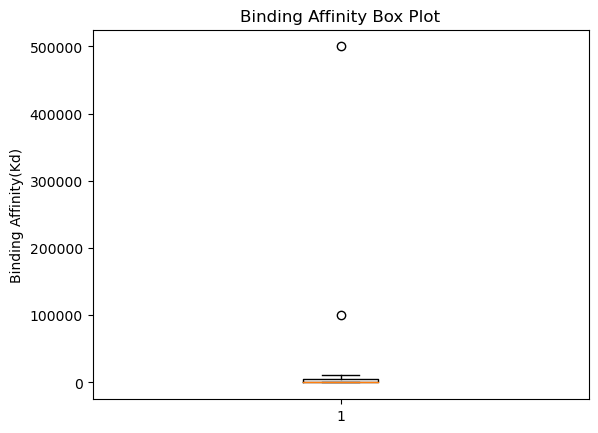

In [20]:
#Identify Outliers for DNA
Binding_affinity = proj_dna_filter1_DNA['Value']
fig1, ax1 = plt.subplots()
ax1.set_title('Binding Affinity Box Plot')
ax1.set_ylabel('Binding Affinity(Kd)')
ax1.boxplot(Binding_affinity)
plt.savefig('Images/Binding Affinity Box Plot DNA.jpg', format = 'jpg', dpi = 1200)

plt.show()

In [21]:
#Identify and show outliers for DNA

Q1 = proj_dna_filter1_DNA['Value'].quantile(0.25)
Q3 = proj_dna_filter1_DNA['Value'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = proj_dna_filter1_DNA[(proj_dna_filter1_DNA['Value'] < Q1 - threshold * IQR) | (proj_dna_filter1_DNA['Value'] > Q3 + threshold * IQR)]
pprint(outliers)

         Experimental Method Release Date Ligand     Value  Symbol Type Unit  \
Entry ID                                                                       
1DB6            SOLUTION NMR   2000-02-03    AAR  100000.0     NaN   Kd   nM   
1Q2T            SOLUTION NMR   2003-09-23    DNA  500000.0     NaN   Kd   nM   

         PDB ID  Molecular Weight per Deposited Model  \
Entry ID                                                
1DB6       1DB6                                  6.90   
1Q2T       1Q2T                                  7.77   

          Number of Distinct DNA Entities  \
Entry ID                                    
1DB6                                  1.0   
1Q2T                                  1.0   

          Number of Distinct Protein Entities Resolution (Å) Stucture Keywords  
Entry ID                                                                        
1DB6                                      NaN            NaN               DNA  
1Q2T                      

In [22]:
#Drop Outliers for DNA
New_proj_dna_filter1_DNA = proj_dna_filter1_DNA.drop(outliers.index)
New_proj_dna_filter1_DNA

,Experimental Method,Release Date,Ligand,Value,Symbol,Type,Unit,PDB ID,Molecular Weight per Deposited Model,Number of Distinct DNA Entities,Number of Distinct Protein Entities,Resolution (Å),Stucture Keywords
Entry ID,,,,,,,,,,,,,
1CVX,X-RAY DIFFRACTION,2000-01-15,HP2,11000.0,NaN,Kd,nM,1CVX,7.42,1.0,NaN,2.27,DNA
1CVY,X-RAY DIFFRACTION,2000-01-15,IPY,380.0,NaN,Kd,nM,1CVY,7.39,1.0,NaN,2.15,DNA
1P96,SOLUTION NMR,2003-08-26,DDI,2540.0,NaN,Kd,nM,1P96,8.49,2.0,NaN,NaN,DNA
1QMS,SOLUTION NMR,1999-10-12,CCI,1.0,NaN,Kd,nM,1QMS,9.34,2.0,NaN,NaN,DNA
1QV4,X-RAY DIFFRACTION,2004-09-07,MBB,124.0,NaN,Kd,nM,1QV4,7.79,1.0,NaN,2.5,DNA
1QV8,X-RAY DIFFRACTION,2004-09-07,BBZ,114.0,NaN,Kd,nM,1QV8,7.78,1.0,NaN,2.5,DNA
1R4E,SOLUTION NMR,2004-04-27,DDI,5330.0,NaN,Kd,nM,1R4E,8.49,2.0,NaN,NaN,DNA
2LOA,SOLUTION NMR,2012-03-14,C4Q,2200.0,NaN,Kd,nM,2LOA,3.42,1.0,NaN,NaN,DNA
407D,X-RAY DIFFRACTION,1998-10-19,HP1,344.0,NaN,Kd,nM,407D,7.54,1.0,NaN,2.2,DNA


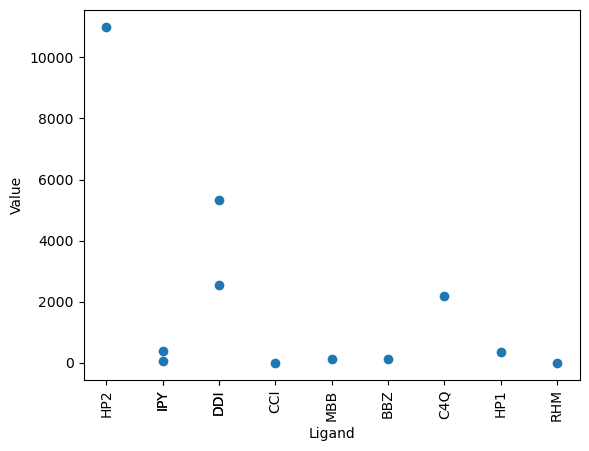

In [23]:
plt.scatter(New_proj_dna_filter1_DNA['Ligand'],New_proj_dna_filter1_DNA['Value'])
plt.xlabel("Ligand")
plt.ylabel("Value")
plt.xticks(New_proj_dna_filter1_DNA['Ligand'], rotation=90)
plt.savefig('Images/Binding Affinity by Ligand for DNA.jpg', format = 'jpg', dpi = 1200)
plt.show()

In [24]:
#Linear Correlation using Pearson's r

correlation=st.pearsonr(New_proj_dna_filter1_DNA['Molecular Weight per Deposited Model'],New_proj_dna_filter1_DNA['Value'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.2


The r-squared is: 0.03940298452579422


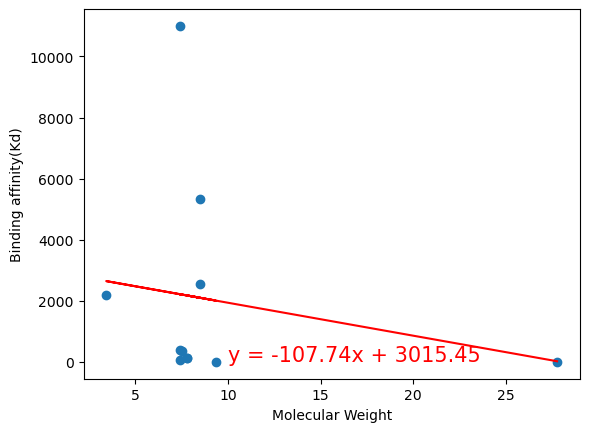

In [25]:
#Linear Regression to look for trends in size vs Kd

x_values = New_proj_dna_filter1_DNA['Molecular Weight per Deposited Model']
y_values = New_proj_dna_filter1_DNA['Value']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="Red")
plt.xlabel('Molecular Weight')
plt.ylabel('Binding affinity(Kd)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Images/Binding affiniy regression for DNA.jpg', format = 'jpg', dpi = 1200)

plt.show()

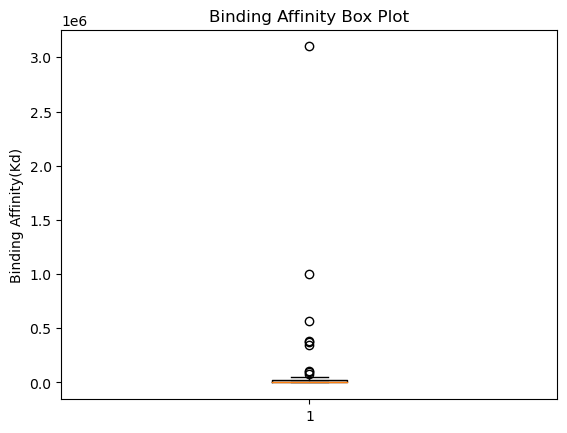

In [26]:
#Identify Outliers for RNA
Binding_affinity = proj_dna_filter1_RNA['Value']
fig1, ax1 = plt.subplots()
ax1.set_title('Binding Affinity Box Plot')
ax1.set_ylabel('Binding Affinity(Kd)')
ax1.boxplot(Binding_affinity)
plt.savefig('Images/Box plot RNA.jpg', format = 'jpg', dpi = 1200)
plt.show()

In [27]:
#Identify and show outliers for RNA

Q1 = proj_dna_filter1_RNA['Value'].quantile(0.25)
Q3 = proj_dna_filter1_RNA['Value'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = proj_dna_filter1_RNA[(proj_dna_filter1_RNA['Value'] < Q1 - threshold * IQR) | (proj_dna_filter1_RNA['Value'] > Q3 + threshold * IQR)]
pprint(outliers)

         Experimental Method Release Date Ligand      Value  Symbol Type Unit  \
Entry ID                                                                        
1ARJ            SOLUTION NMR   1996-11-08    ARG  1000000.0     NaN   Kd   nM   
1I9V       X-RAY DIFFRACTION   2001-06-04    NMY   342000.0     NaN   Ki   nM   
2XNW       X-RAY DIFFRACTION   2011-04-06    ZZR   370000.0     NaN   Kd   nM   
2XNZ       X-RAY DIFFRACTION   2011-04-06    3AW   110000.0     NaN   Kd   nM   
2XO0       X-RAY DIFFRACTION   2011-04-06    ZZS    80000.0     NaN   Kd   nM   
2XO1       X-RAY DIFFRACTION   2011-04-06    N6M   100000.0     NaN   Kd   nM   
3SLM       X-RAY DIFFRACTION   2011-08-17    DGP   379000.0     NaN   Kd   nM   
4ERJ       X-RAY DIFFRACTION   2012-07-18    ACA  3100000.0     NaN   Kd   nM   
4ERL       X-RAY DIFFRACTION   2012-07-18    LYS   570000.0     NaN   Kd   nM   

         PDB ID  Molecular Weight per Deposited Model  \
Entry ID                                           

In [28]:
#Drop Outliers for RNA
New_proj_dna_filter1_RNA = proj_dna_filter1_RNA.drop(outliers.index)
New_proj_dna_filter1_RNA

,Experimental Method,Release Date,Ligand,Value,Symbol,Type,Unit,PDB ID,Molecular Weight per Deposited Model,Number of Distinct DNA Entities,Number of Distinct Protein Entities,Resolution (Å),Stucture Keywords
Entry ID,,,,,,,,,,,,,
1BYJ,SOLUTION NMR,1999-10-29,GE1,2000.00,NaN,Kd,nM,1BYJ,9.11,NaN,NaN,NaN,RNA
1F1T,X-RAY DIFFRACTION,2000-09-04,ROS,40.00,NaN,Kd,nM,1F1T,13.76,NaN,NaN,2.8,RNA
1F27,X-RAY DIFFRACTION,2000-06-12,BTN,1000.00,NaN,Kd,nM,1F27,9.98,NaN,NaN,1.3,RNA
1FYP,SOLUTION NMR,2001-03-14,PAR,2500.00,NaN,Kd,nM,1FYP,9.29,NaN,NaN,NaN,RNA
1Q8N,SOLUTION NMR,2004-03-23,MGR,800.00,NaN,Kd,nM,1Q8N,12.65,NaN,NaN,NaN,RNA
1YKV,X-RAY DIFFRACTION,2005-02-22,DAI,10000.00,NaN,Kd,nM,1YKV,32.44,NaN,NaN,3.3,RNA
1YRJ,X-RAY DIFFRACTION,2005-06-07,AM2,200.00,NaN,IC50,nM,1YRJ,15.85,NaN,NaN,2.7,RNA
2AU4,SOLUTION NMR,2006-03-28,GTP,75.00,NaN,Kd,nM,2AU4,13.85,NaN,NaN,NaN,RNA
2B57,X-RAY DIFFRACTION,2006-05-23,6AP,17.00,NaN,Kd,nM,2B57,22.52,NaN,NaN,2.15,RNA


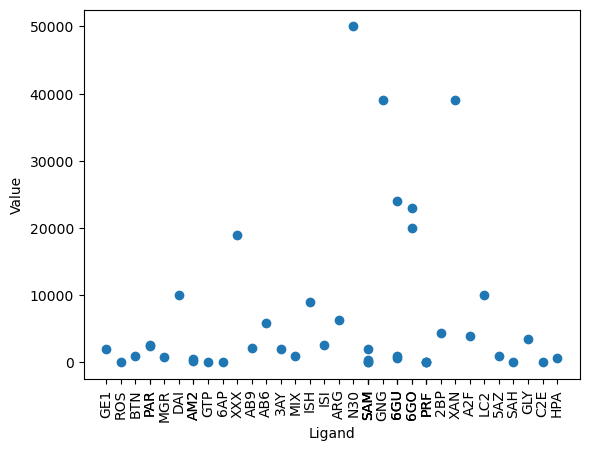

In [29]:
#Scatter Plot for RNA, Ligands and the Value

plt.scatter(New_proj_dna_filter1_RNA['Ligand'],New_proj_dna_filter1_RNA['Value'])
plt.xlabel("Ligand")
plt.ylabel("Value")
plt.xticks(New_proj_dna_filter1_RNA['Ligand'], rotation=90)
plt.savefig('Images/Binding Affinity Distribution for RNA.jpg', format = 'jpg', dpi = 1200)
plt.show()

The correlation between both factors is 0.05


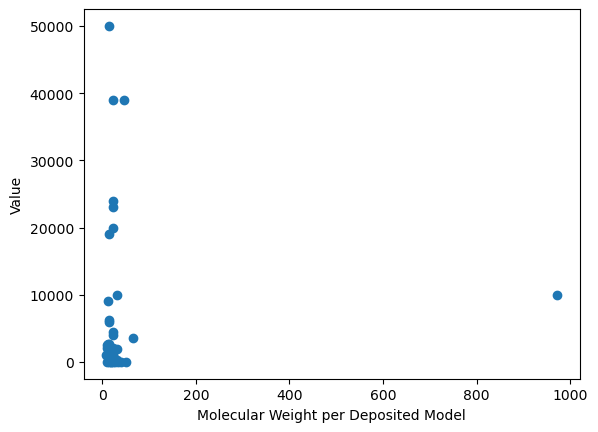

In [30]:
#Linear Correlation using Pearson's r for Weight and Value
x = New_proj_dna_filter1_RNA['Molecular Weight per Deposited Model']
y = New_proj_dna_filter1_RNA['Value']
correlation = st.pearsonr(x,y)
plt.scatter(New_proj_dna_filter1_RNA['Molecular Weight per Deposited Model'],New_proj_dna_filter1_RNA['Value'])
plt.xlabel('Molecular Weight per Deposited Model')
plt.ylabel('Value')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The r-squared is: 0.002277336600934839


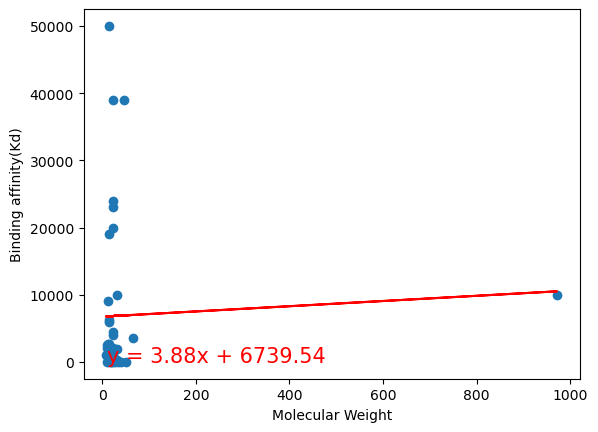

In [31]:
#Linear Regression to look for trends in size vs Kd

x_values = New_proj_dna_filter1_RNA['Molecular Weight per Deposited Model']
y_values = New_proj_dna_filter1_RNA['Value']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="Red")
plt.xlabel('Molecular Weight')
plt.ylabel('Binding affinity(Kd)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Images/Binding Affinity regression for RNA.jpg', format = 'jpg', dpi = 1200)
plt.show()